# Initation
Reading all result files, replace the results_dir with the relevant path.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ersätt denna path.
results_dir = "/Volumes/GoogleDrive/.shortcut-targets-by-id/10oYqI9u7nCLK0q7xF2CvGGIQVokusjaI/Exjobb/11. Results"
bad_ids = {'11709051', '11110022', '11110668', '11110283'}

# Read ids and results and pick out which items are from combined policy and which are from "regular" one.
item_ids = pd.read_csv(f"{results_dir}/csv_files/item_ids.csv")["Item id"].to_numpy()
results_df = pd.read_csv(f"{results_dir}/csv_files/results.csv")
ids_combined = results_df.loc[results_df["MMI inventory policy"] == "PDCZA_Johannesburg_Combined_IP","Item id"].to_numpy()
ids_regular = results_df.loc[results_df["MMI inventory policy"] == "PDCZA_Johannesburg_IP","Item id"].to_numpy()

for bad_id in bad_ids:
    item_ids = item_ids[item_ids != bad_id] # Removing this bad boy
    ids_combined = ids_combined[ids_combined != bad_id]
    ids_regular = ids_regular[ids_regular != bad_id]

results_df.set_index("Item id", drop = False, inplace = True)

df_dict = {}

for id in item_ids:
    df = pd.read_csv(f"{results_dir}/csv_files/{id}_results.csv")
    df.set_index("Installation name", inplace = True)
    df_dict[id] = df
    
assert len(ids_combined) == 25
assert len(ids_regular) == 9


# Graph init

In [53]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib.ticker as mtick

graph_dir = "/Volumes/GoogleDrive/.shortcut-targets-by-id/10oYqI9u7nCLK0q7xF2CvGGIQVokusjaI/Exjobb/11. Results/graphs"

all_dealers = ["Bartlett","Bloemfontein","Capetown","Durban","George",
"Kimberley","Middelburg","Nelspruit","Port Elizabeth",
"Richards Bay","Rustenburg","Steelpoort","Wolmaransstad"]
dealer_dict = {"Bartlett" : "A","Bloemfontein": "B","Capetown": "C","Durban": "D","George": "E",
"Kimberley": "F","Middelburg": "H","Nelspruit": "I","Port Elizabeth": "J",
"Richards Bay" : "K","Rustenburg": "L","Steelpoort": "M","Wolmaransstad": "N"}

color_dict = {"BM_model": '#2D3B60', "SE_model": '#7488BD', "BM_simulation": '#577C24', "SE_simulation": '#CBE5A6', "Target": 'gray'}
linestyle_dict = {"BM_model": 'solid', "SE_model": 'dashed', "BM_simulation": 'dotted', "SE_simulation": 'dashdot', "Target": 'solid'}
marker_dict = {"BM_model": 'o', "SE_model": '^', "BM_simulation": 's', "SE_simulation": 'D', "Target": '.'}


# Reorder points
- Warehouse reorder points
- Reorder points at specific dealer
- Mean reorder point at dealers

## Warehouse reorder points

R warehouse combined policy per item.


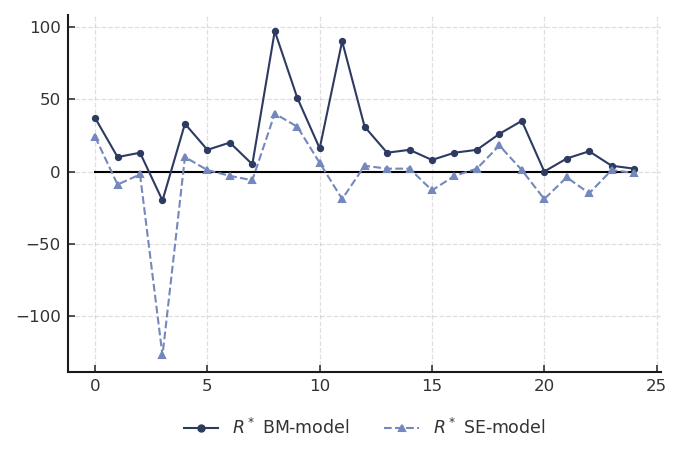

In [54]:
# Warehouse reorder points combined items
df = pd.DataFrame({"Item id": ids_combined,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"R_wh_BM"] = df_dict[id].loc["Johannesburg","R, BM model"]
    df.loc[id,"R_wh_SE"] = df_dict[id].loc["Johannesburg","R, SE model"]

df.reset_index(inplace = True)

x = df.index.values
x_zeros = x
y_R_BM = df["R_wh_BM"].values
y_R_SE = df["R_wh_SE"].values

y_R_BM2 = df["R_wh_BM"].values +40
y_R_SE2 = df["R_wh_SE"].values +40

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x_zeros,np.zeros_like(x_zeros), color = 'black',linestyle = '-')
ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)

print("R warehouse combined policy per item.")
plt.savefig(f"{graph_dir}/01_RDC_R_per_item_combined.png")
plt.show()

R warehouse, regular policy, per item.


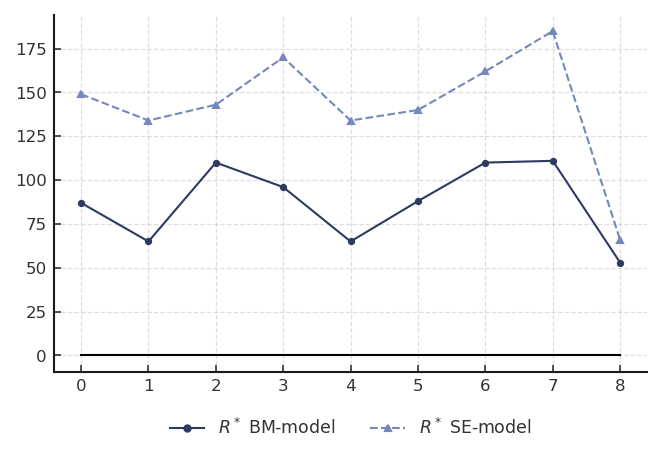

In [56]:
df = pd.DataFrame({"Item id": ids_regular,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
df.set_index("Item id", inplace = True)
for id in ids_regular:
    df.loc[id,"R_wh_BM"] = df_dict[id].loc["Johannesburg","R, BM model"]
    df.loc[id,"R_wh_SE"] = df_dict[id].loc["Johannesburg","R, SE model"]

df.reset_index(inplace = True)

x = df.index.values
y_R_BM = df["R_wh_BM"].values
y_R_SE = df["R_wh_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x,np.zeros_like(x), color = 'black',linestyle = '-')
ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)

print("R warehouse, regular policy, per item.")
plt.savefig(f"{graph_dir}/02_warehouse_R_per_item_regular.png")
plt.show()

## Reorder point at specific dealer

### Combined policy

R Bartlett combined policy per item.
Dealer contains all items.


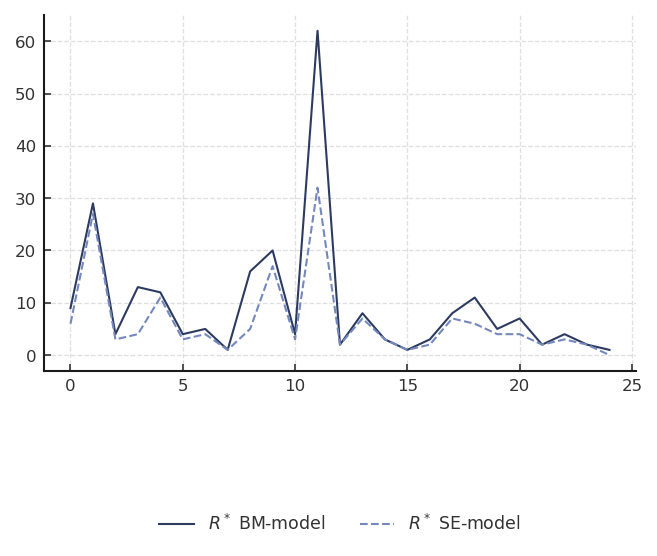

R Bloemfontein combined policy per item.
Dealer contains all items.


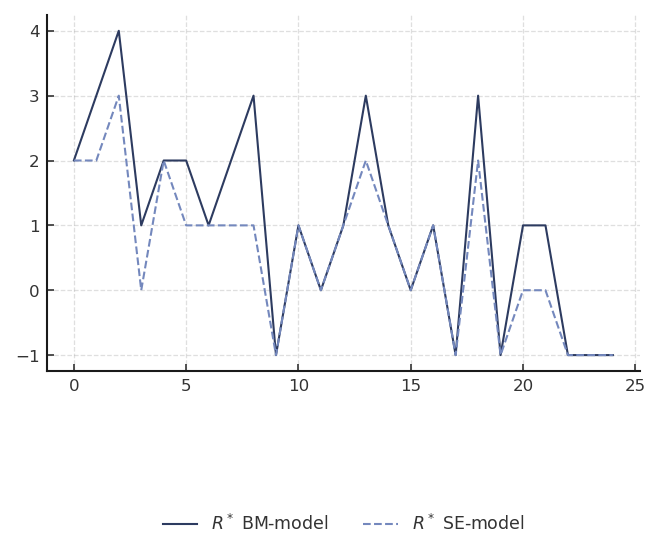

R Capetown combined policy per item.
Dealer contains all items.


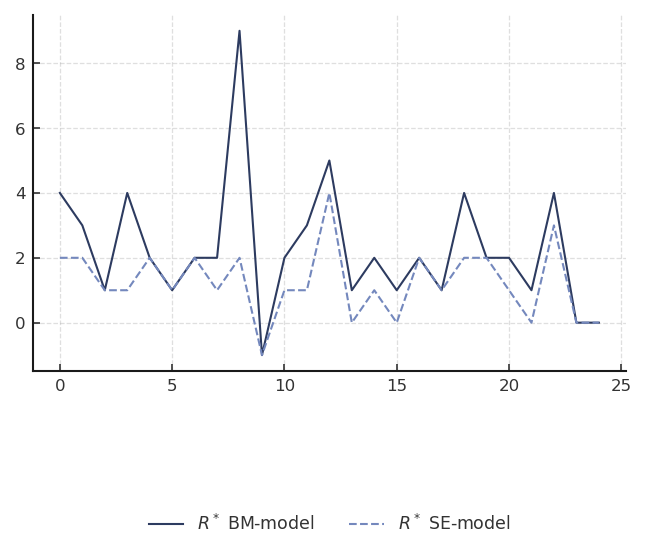

R Durban combined policy per item.
Items: {'1522293'} are not available at Durban.


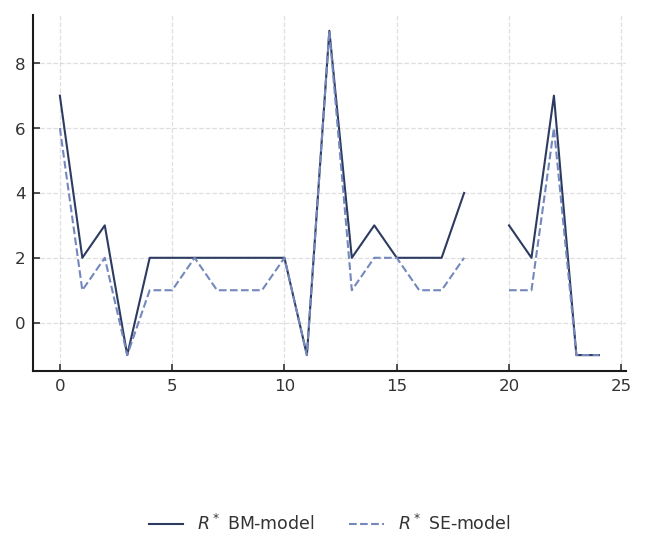

R George combined policy per item.
Items: {'13947627', '11882353', '13947630', '14511215', '1522293', '13947628', '14508017', '14524171'} are not available at George.


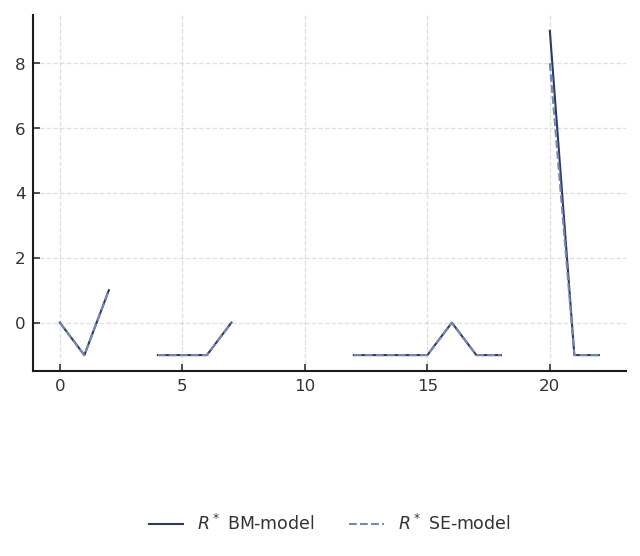

R Kimberley combined policy per item.
Items: {'13947627', '13947630', '11708551', '1522293', '14596399'} are not available at Kimberley.


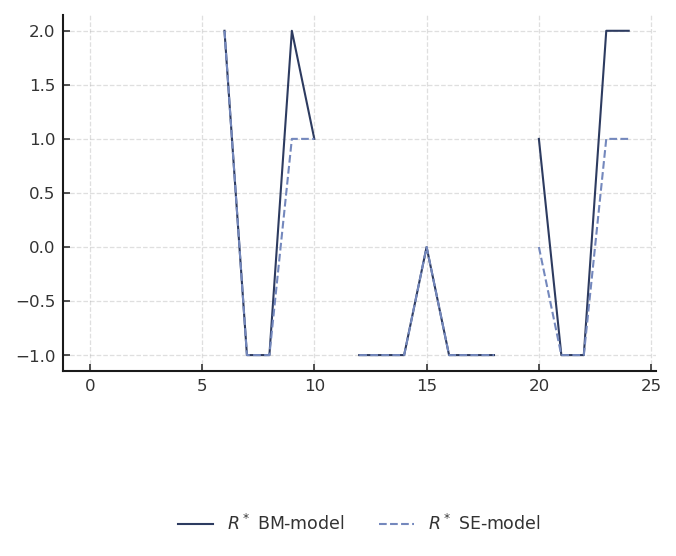

R Middelburg combined policy per item.
Items: {'11716790', '14519261'} are not available at Middelburg.


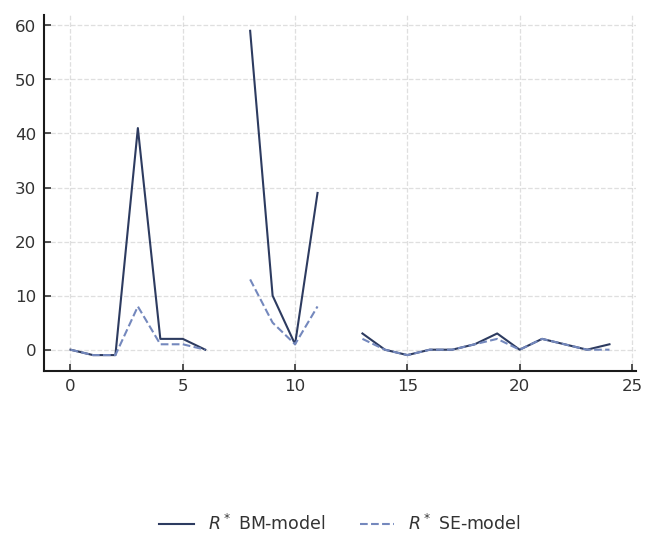

R Nelspruit combined policy per item.
Items: {'11708551'} are not available at Nelspruit.


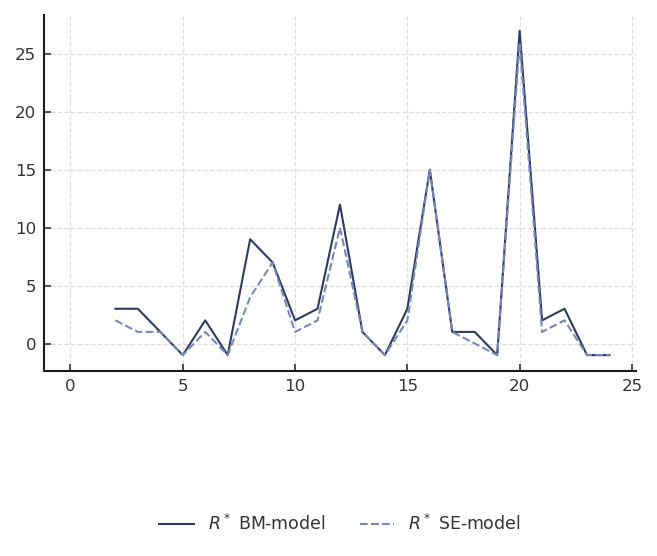

R Port Elizabeth combined policy per item.
Items: {'13947627', '13947630', '11988555', '1522293', '14508017', '14524171'} are not available at Port Elizabeth.


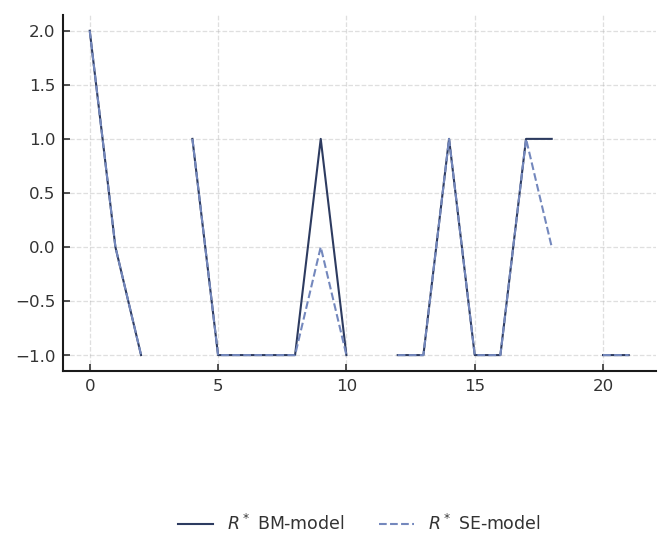

R Richards Bay combined policy per item.
Items: {'14524171', '14508017'} are not available at Richards Bay.


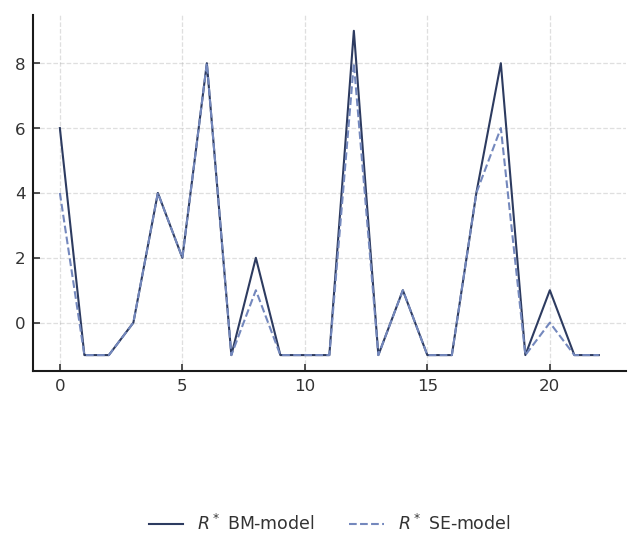

R Rustenburg combined policy per item.
Items: {'11709302', '11708551', '11716790', '11709133', '14508017', '14524171'} are not available at Rustenburg.


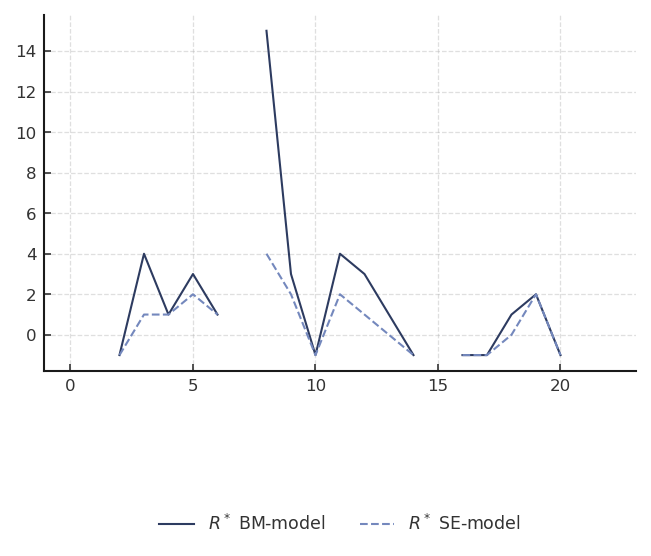

R Steelpoort combined policy per item.
Items: {'11882353', '11988555', '11708551', '11716790', '11709133', '14508017', '14524171', '14519261'} are not available at Steelpoort.


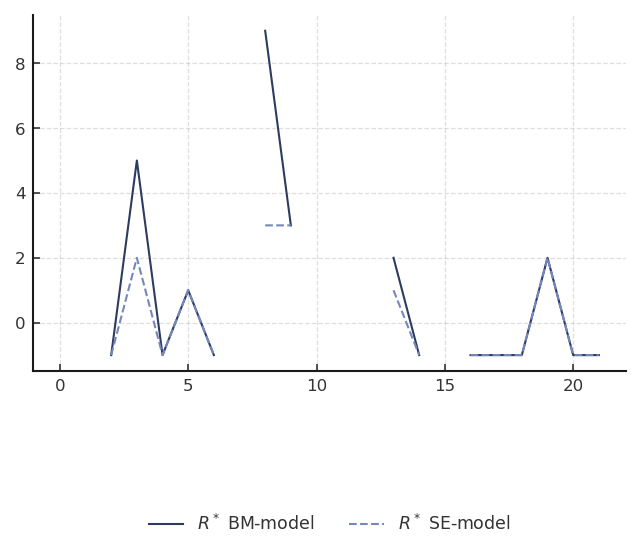

R Wolmaransstad combined policy per item.
Items: {'11882353', '11716790', '14519261'} are not available at Wolmaransstad.


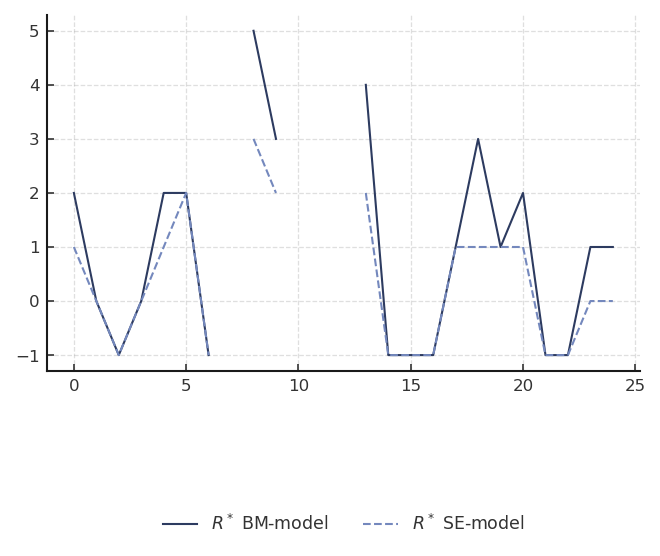

In [57]:
# R per item at a specific dealers for combined items.
# For one dealer
dealer_list = all_dealers
for dealer in dealer_list:
    df = pd.DataFrame({"Item id": ids_combined,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
    df.set_index("Item id", inplace = True)
    
    items_not_in_dealer = set()
    for id in ids_combined:
        try:
            df.loc[id,"R_wh_BM"] = df_dict[id].loc[dealer,"R, BM model"]
            df.loc[id,"R_wh_SE"] = df_dict[id].loc[dealer,"R, SE model"]
        except KeyError:
            items_not_in_dealer.add(id)

    df.reset_index(inplace = True)

    x = df.index.values
    y_R_BM = df["R_wh_BM"].values
    y_R_SE = df["R_wh_SE"].values

    plt.style.use('our_style.mplstyle')
    fig, ax = plt.subplots()
    ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
    ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
    ax.legend(bbox_to_anchor=(0.5,-0.5),ncol = 2)

    print(f"R {dealer} combined policy per item.")
    if len(items_not_in_dealer) == 0:
        print("Dealer contains all items.")
    else:
        print(f"Items: {items_not_in_dealer} are not available at {dealer}.")
    plt.show()

### Regular policy

R Bartlett regular policy per item.
Dealer contains all items.


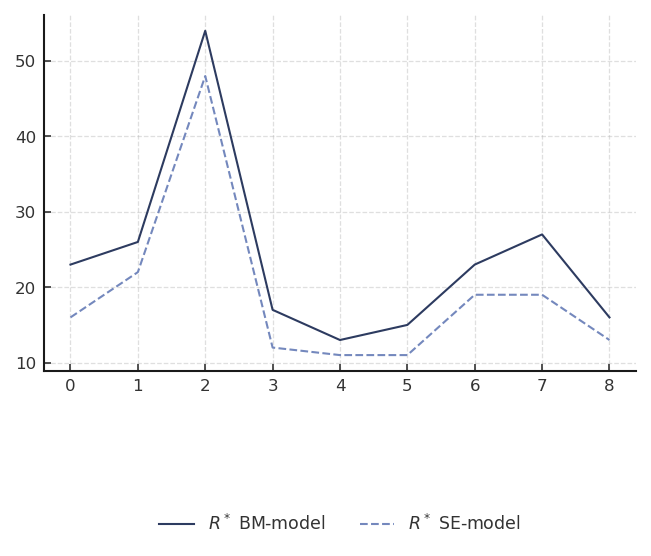

R Bloemfontein regular policy per item.
Dealer contains all items.


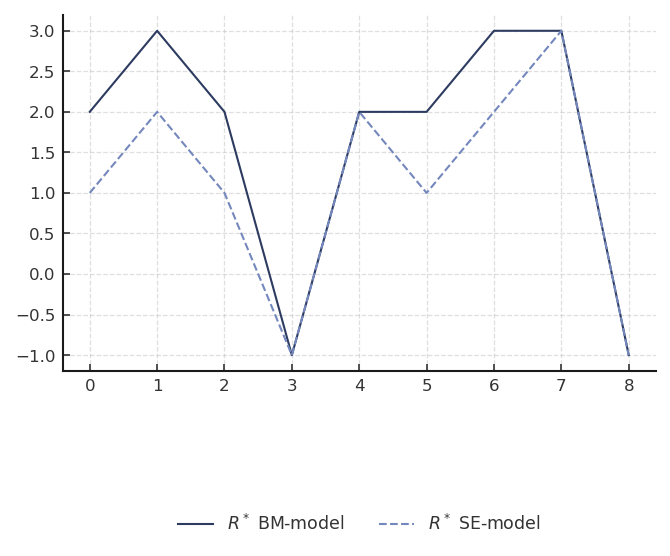

R Capetown regular policy per item.
Dealer contains all items.


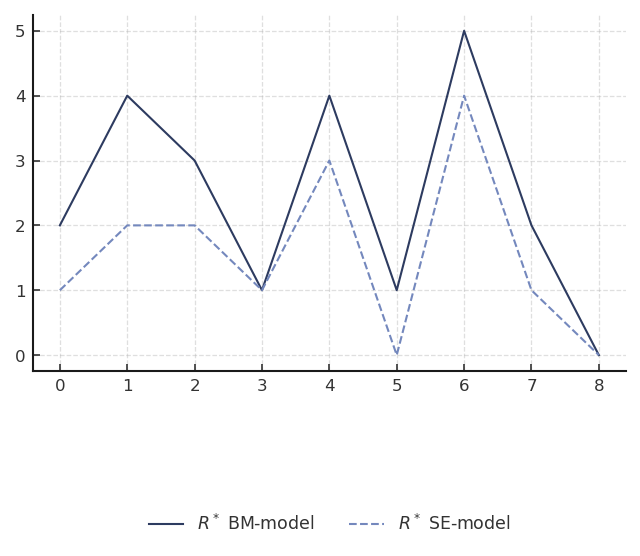

R Durban regular policy per item.
Dealer contains all items.


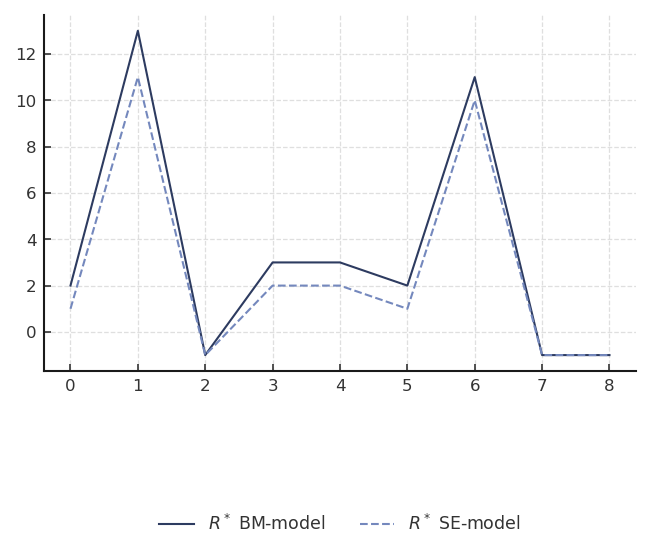

R George regular policy per item.
Items: {'14690316'} are not available at George.


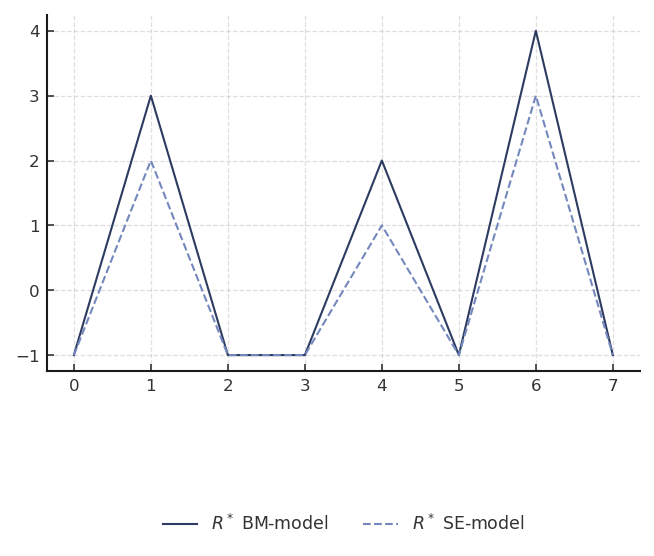

R Kimberley regular policy per item.
Dealer contains all items.


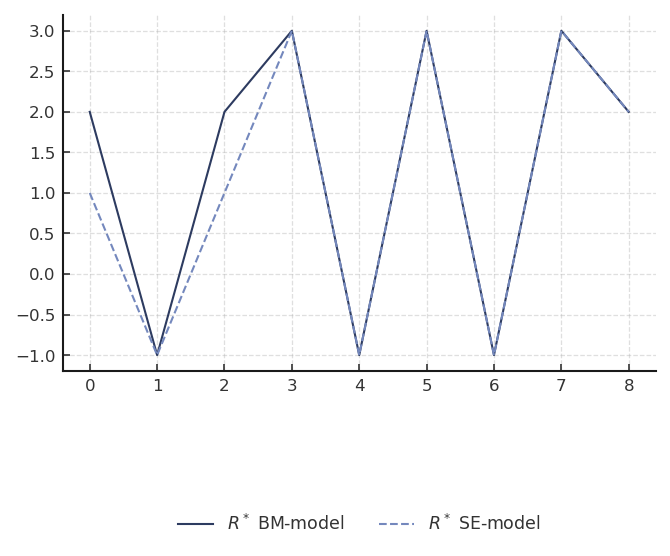

R Middelburg regular policy per item.
Dealer contains all items.


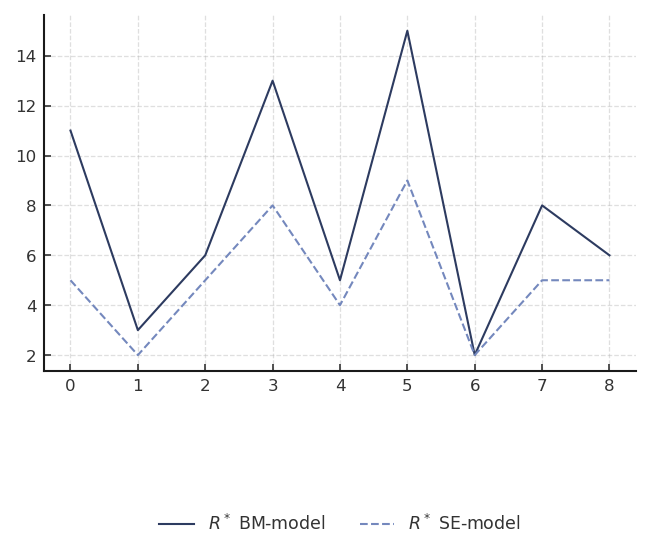

R Nelspruit regular policy per item.
Dealer contains all items.


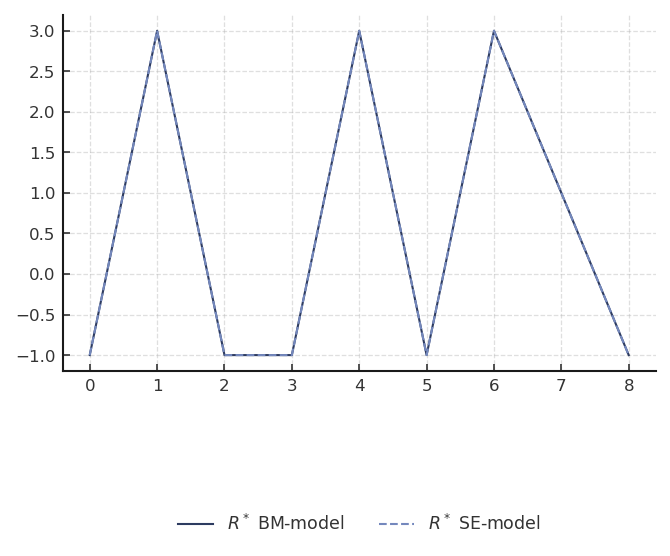

R Port Elizabeth regular policy per item.
Items: {'14750657'} are not available at Port Elizabeth.


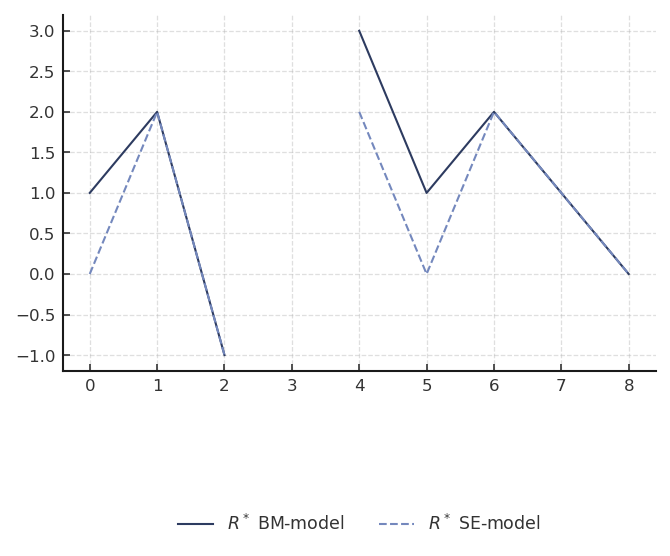

R Richards Bay regular policy per item.
Items: {'14690316'} are not available at Richards Bay.


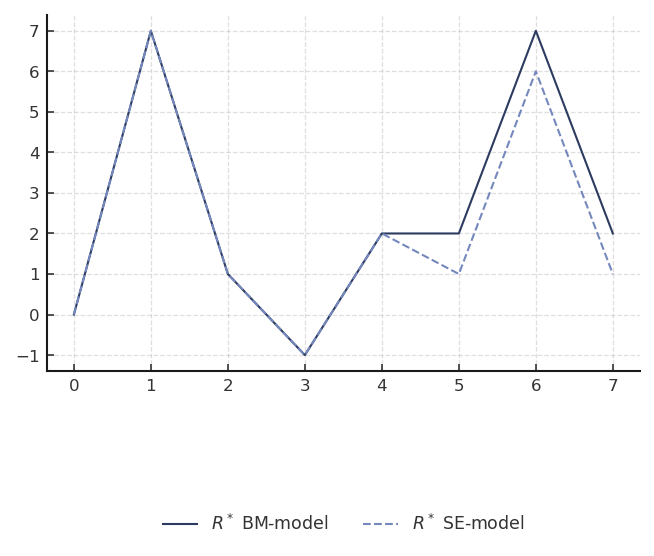

R Rustenburg regular policy per item.
Dealer contains all items.


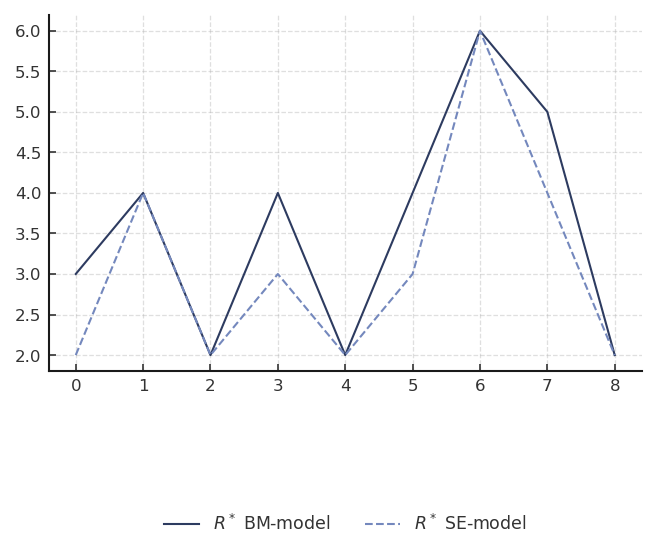

R Steelpoort regular policy per item.
Dealer contains all items.


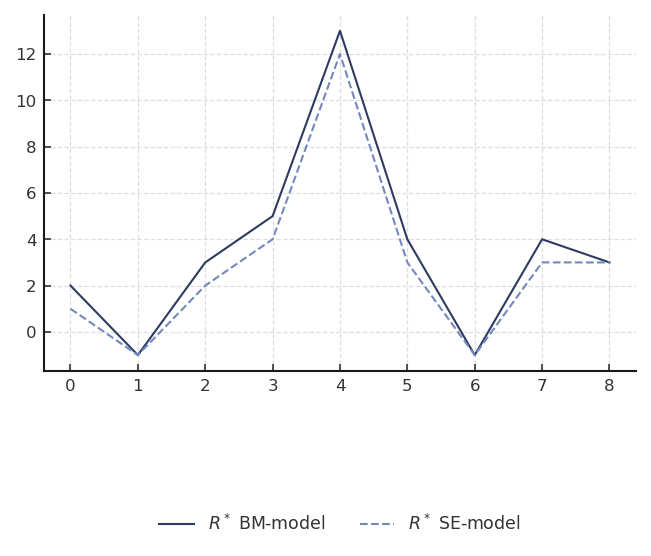

R Wolmaransstad regular policy per item.
Dealer contains all items.


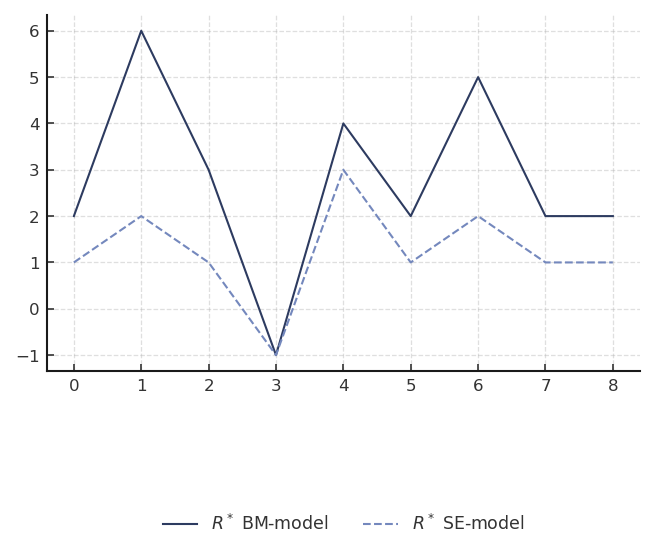

In [58]:
# R per item at a specific dealers for regular items.
# For one dealer
dealer_list = all_dealers
for dealer in dealer_list:
    df = pd.DataFrame({"Item id": ids_regular,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
    df.set_index("Item id", inplace = True)
    
    items_not_in_dealer = set()
    for id in ids_regular:
        try:
            df.loc[id,"R_wh_BM"] = df_dict[id].loc[dealer,"R, BM model"]
            df.loc[id,"R_wh_SE"] = df_dict[id].loc[dealer,"R, SE model"]
        except KeyError:
            items_not_in_dealer.add(id)

    df.reset_index(inplace = True)

    x = df.index.values
    y_R_BM = df["R_wh_BM"].values
    y_R_SE = df["R_wh_SE"].values

    plt.style.use('our_style.mplstyle')
    fig, ax = plt.subplots()
    ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
    ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
    ax.legend(bbox_to_anchor=(0.5,-0.5),ncol = 2)

    print(f"R {dealer} regular policy per item.")
    if len(items_not_in_dealer) == 0:
        print("Dealer contains all items.")
    else:
        print(f"Items: {items_not_in_dealer} are not available at {dealer}.")
    plt.show()

## Mean reorder point at dealers

### Combined policy


Dealer R mean combined policy per item.


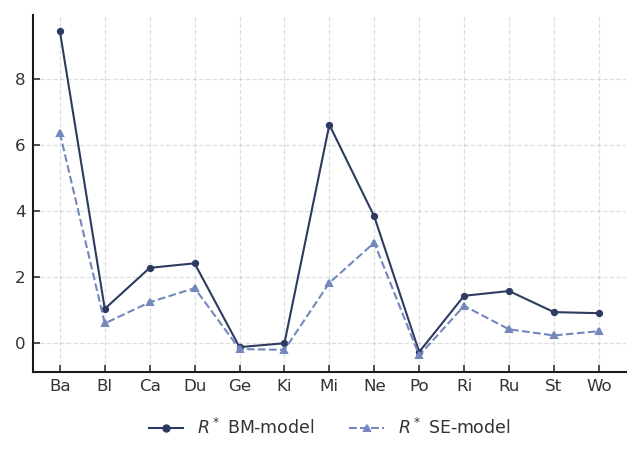

In [59]:
# Mean R per dealer for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"Dealer": dealer_list, "Dealer identifier": dealer_dict.values(), "R_mean_BM": np.nan,"R_mean_SE": np.nan})
df.set_index("Dealer", inplace = True)
x_list = []

for dealer in dealer_list:
    R_BM_sum = 0
    R_SE_sum = 0
    R_count = 0
    for id in ids_combined:
        try:
            R_BM_sum += int(df_dict[id].loc[dealer,"R, BM model"])
            R_SE_sum += int(df_dict[id].loc[dealer,"R, SE model"])
            R_count += 1
        except KeyError:
            pass
            
    if R_count > 0:
        df.loc[dealer,"R_mean_BM"] = R_BM_sum/R_count
        df.loc[dealer,"R_mean_SE"] = R_SE_sum/R_count
    else:
        df.loc[dealer,"R_mean_BM"] = np.nan
        df.loc[dealer,"R_mean_SE"] = np.nan

    x_list.append(dealer[:2])

x = df["Dealer identifier"].values
y_R_BM = df["R_mean_BM"].values
y_R_SE = df["R_mean_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x_list, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x_list, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)

print(f"Dealer R mean combined policy per item.")
plt.savefig(f"{graph_dir}/03_dealer_mean_R_per_item_combined.png")
plt.show()

### Regular policy


Dealer R mean regular policy per item.


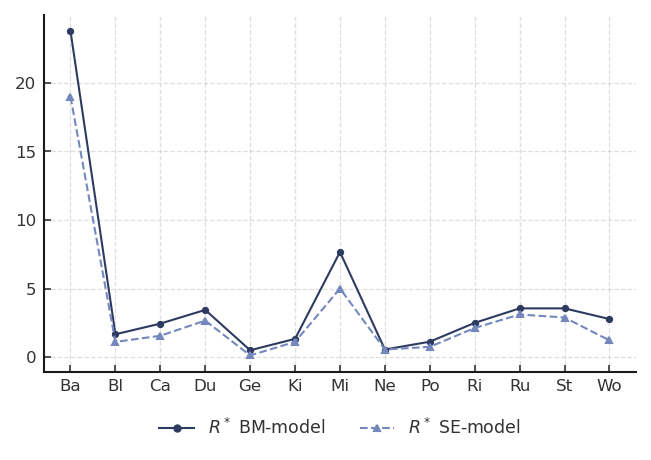

In [60]:
# Mean R per dealer for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"Dealer": dealer_list, "Dealer identifier": dealer_dict.values(), "R_mean_BM": np.nan,"R_mean_SE": np.nan})
df.set_index("Dealer", inplace = True)
x_list = []

for dealer in dealer_list:
    R_BM_sum = 0
    R_SE_sum = 0
    R_count = 0
    for id in ids_regular:
        try:
            R_BM_sum += int(df_dict[id].loc[dealer,"R, BM model"])
            R_SE_sum += int(df_dict[id].loc[dealer,"R, SE model"])
            R_count += 1
        except KeyError:
            pass
            
    if R_count > 0:
        df.loc[dealer,"R_mean_BM"] = R_BM_sum/R_count
        df.loc[dealer,"R_mean_SE"] = R_SE_sum/R_count
    else:
        df.loc[dealer,"R_mean_BM"] = np.nan
        df.loc[dealer,"R_mean_SE"] = np.nan

    x_list.append(dealer[:2])

x = df["Dealer identifier"].values
y_R_BM = df["R_mean_BM"].values
y_R_SE = df["R_mean_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x_list, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x_list, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)

print(f"Dealer R mean regular policy per item.")
plt.savefig(f"{graph_dir}/04_dealer_mean_R_per_item_regular.png")
plt.show()

## Mean reorder point per demand type NOT DONE

# Fill rates

## Fill rate warehouse 

- Absolute values
- Deviation


### Combined policy

IFR warehouse combined policy per item.


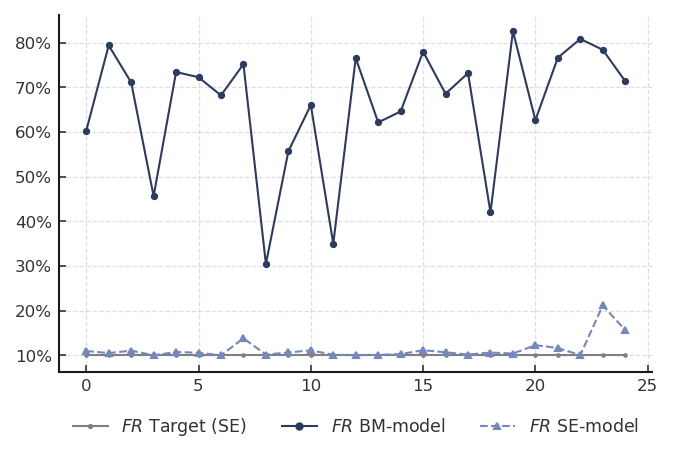

In [61]:
# Warehouse reorder points combined items, only models
df = pd.DataFrame({"Item id": ids_combined,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
#ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
#ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 4)

print("IFR warehouse combined policy per item.")
plt.savefig(f"{graph_dir}/05_RDC_IFR_per_item_combined.png")
plt.show()

IFR warehouse combined policy per item with simulaiton.


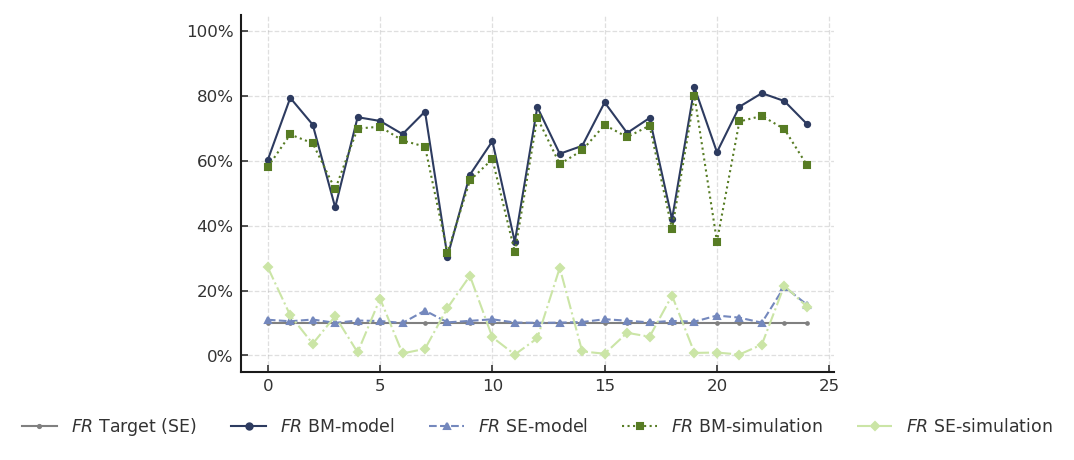

In [62]:
# Warehouse reorder points combined items, only models
df = pd.DataFrame({"Item id": ids_combined,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 5)

print("IFR warehouse combined policy per item with simulaiton.")
plt.savefig(f"{graph_dir}/07_RDC_IFR_per_item_combined_with_sim.png")
plt.show()

### Regular policy

IFR warehouse regular policy per item.


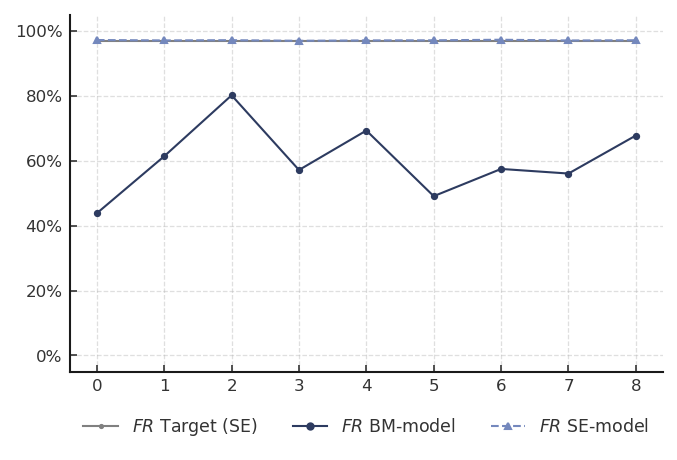

In [63]:
# Warehouse fillrates regular items,
df = pd.DataFrame({"Item id": ids_regular,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_regular:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
#ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
#ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 3)

print("IFR warehouse regular policy per item.")
plt.savefig(f"{graph_dir}/08_RDC_IFR_per_item_regular.png")
plt.show()

IFR warehouse regular policy per item.


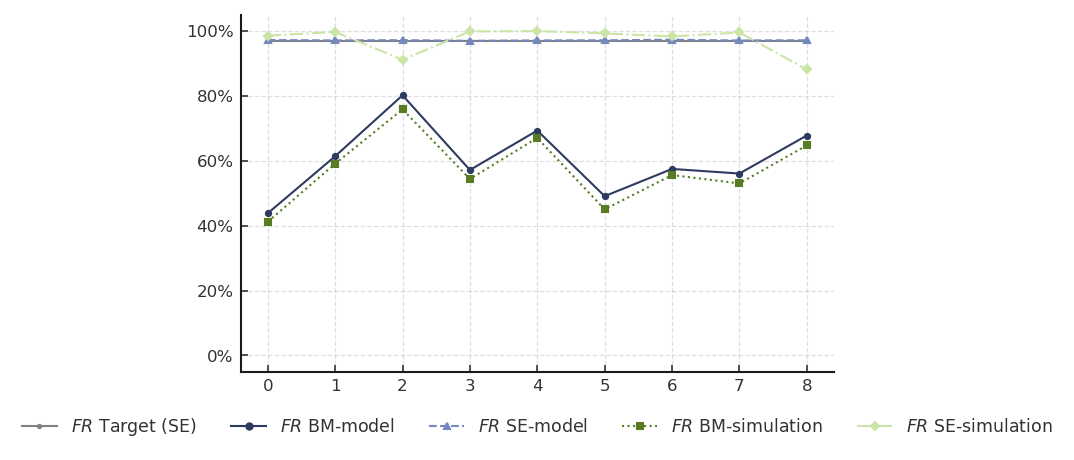

In [64]:
# Warehouse fill rates with wim regular items
df = pd.DataFrame({"Item id": ids_regular,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_regular:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 5)

print("IFR warehouse regular policy per item.")
plt.savefig(f"{graph_dir}/09_RDC_IFR_per_item_regular_with_sim.png")
plt.show()

## Mean fill rate at dealers per dealer





### Combined policy


Dealer IFR mean combined policy per dealer.


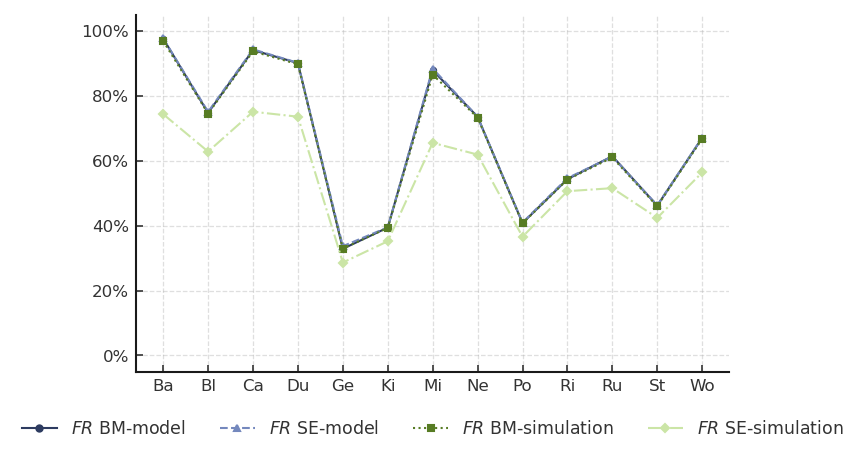

In [65]:
# Mean R per dealer for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"Dealer": dealer_list, "Dealer identifier": dealer_dict.values(), 
"IFR_mean_dealer_BM": np.nan,"IFR_mean_dealer_SE": np.nan, "IFR_mean_dealer_BM_sim": np.nan,
"IFR_mean_dealer_SE_sim": np.nan})

df.set_index("Dealer", inplace = True)
x_list = []

for dealer in dealer_list:
    IFR_BM_sum = 0
    IFR_SE_sum = 0
    IFR_BM_sim_sum = 0
    IFR_SE_sim_sum = 0
    IFR_count = 0

    for id in ids_combined:
        try:
            IFR_BM_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM model"])
            IFR_SE_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE model"])
            IFR_BM_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM simulation"])
            IFR_SE_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE simulation"])
            
            IFR_count += 1
        except KeyError:
            pass
            
    if IFR_count > 0:
        df.loc[dealer,"IFR_mean_dealer_BM"] = IFR_BM_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE"] = IFR_SE_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = IFR_BM_sim_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = IFR_SE_sim_sum/IFR_count
    else:
        df.loc[dealer,"IFR_mean_dealer_BM"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = np.nan

    x_list.append(dealer[:2])

x = x_list
y_mean_IFR_BM = df["IFR_mean_dealer_BM"].values
y_mean_IFR_SE = df["IFR_mean_dealer_SE"].values
y_mean_IFR_BM_sim = df["IFR_mean_dealer_BM_sim"].values
y_mean_IFR_SE_sim = df["IFR_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

#ax.plot(x, y_mean_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)
ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 4)

print(f"Dealer IFR mean combined policy per dealer.")
plt.savefig(f"{graph_dir}/10_dealer_mean_IFR_per_dealer_combined_absolute_scale.png")
plt.show()

Error: George, 14690316
Error: Port Elizabeth, 14750657
Error: Richards Bay, 14690316
Dealer IFR mean regular policy per dealer.


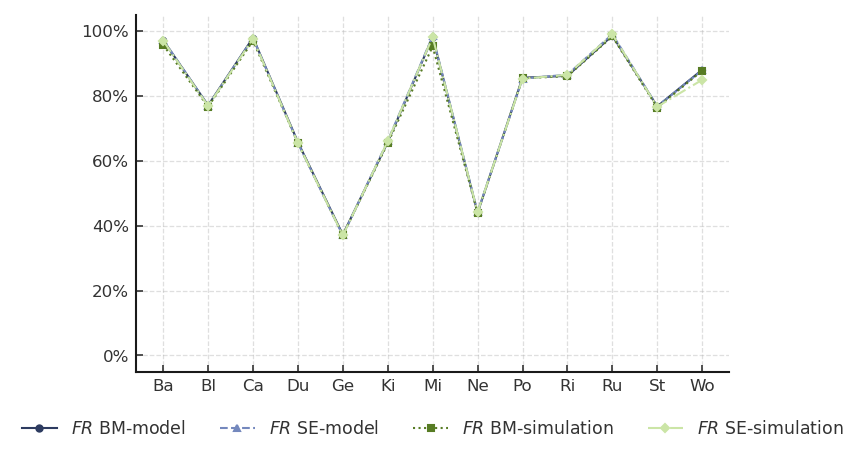

In [66]:
# Mean IFR per dealer for regular policy.
dealer_list = all_dealers

df = pd.DataFrame({"Dealer": dealer_list,
"IFR_mean_dealer_BM": np.nan,"IFR_mean_dealer_SE": np.nan, "IFR_mean_dealer_BM_sim": np.nan,
"IFR_mean_dealer_SE_sim": np.nan})

df.set_index("Dealer", inplace = True)
x_list = []

for dealer in dealer_list:
    IFR_BM_sum = 0
    IFR_SE_sum = 0
    IFR_BM_sim_sum = 0
    IFR_SE_sim_sum = 0
    IFR_count = 0

    for id in ids_regular:
        try:
            IFR_BM_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM model"])
            IFR_SE_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE model"])
            IFR_BM_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM simulation"])
            IFR_SE_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE simulation"])
            
            IFR_count += 1
        except KeyError:
            print(f"Error: {dealer}, {id}")
            
            
    if IFR_count > 0:
        df.loc[dealer,"IFR_mean_dealer_BM"] = IFR_BM_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE"] = IFR_SE_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = IFR_BM_sim_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = IFR_SE_sim_sum/IFR_count
    else:
        df.loc[dealer,"IFR_mean_dealer_BM"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = np.nan

    x_list.append(dealer[:2])

x = x_list
y_mean_IFR_BM = df["IFR_mean_dealer_BM"].values
y_mean_IFR_SE = df["IFR_mean_dealer_SE"].values
y_mean_IFR_BM_sim = df["IFR_mean_dealer_BM_sim"].values
y_mean_IFR_SE_sim = df["IFR_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

#ax.plot(x, y_mean_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)
ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 4)

print(f"Dealer IFR mean regular policy per dealer.")
plt.savefig(f"{graph_dir}/11_dealer_mean_IFR_per_dealer_combined_absolute_scale.png")
plt.show()

## Mean fill rate deviation per item
- deviation

### Combined policy

Dealer IFR mean combined policy per item.


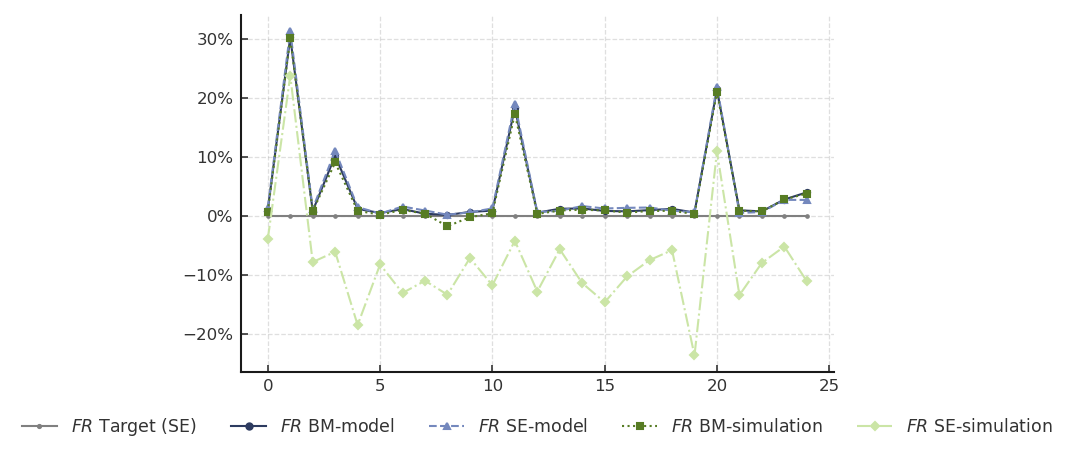

In [67]:
# Mean IFR deviation per item for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_combined, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_combined:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
            IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
            IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
            IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target
            
            IFR_count += 1
        except KeyError:
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#ax.set_ylim(-0.2,0.2)
ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 5)

print(f"Dealer IFR mean combined policy per item.")
plt.savefig(f"{graph_dir}/12_dealer_mean_IFR_deviation_per_item_combined.png")
plt.show()

### Regular policy

Dealer IFR mean regular policy per dealer.


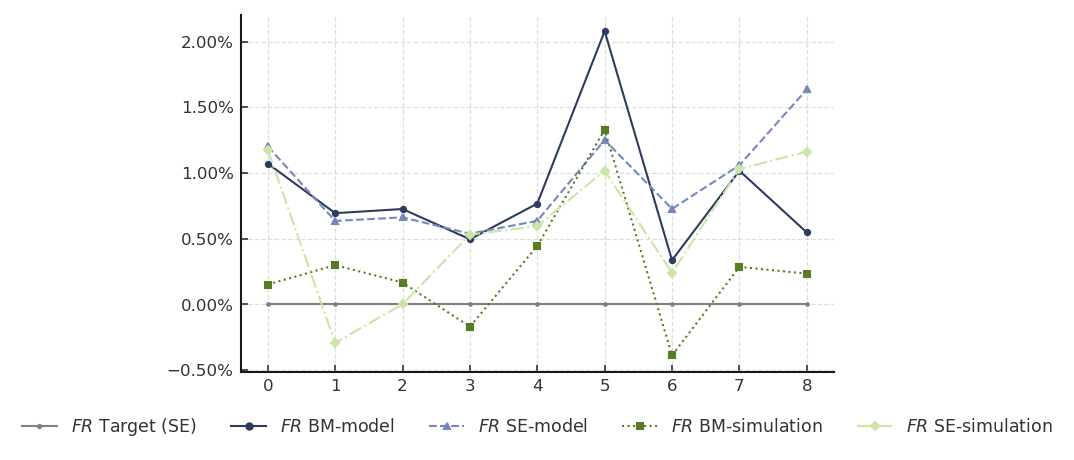

In [68]:
# Mean IFR deviation per item for regular policy.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_regular, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_regular:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
            IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
            IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
            IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target
            
            IFR_count += 1
        except KeyError:
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 5)

print(f"Dealer IFR mean regular policy per dealer.")
plt.savefig(f"{graph_dir}/13_dealer_mean_IFR_deviation_per_item_regular.png")
plt.show()

# Mean stock on hand per item

Soh per item, combined policy


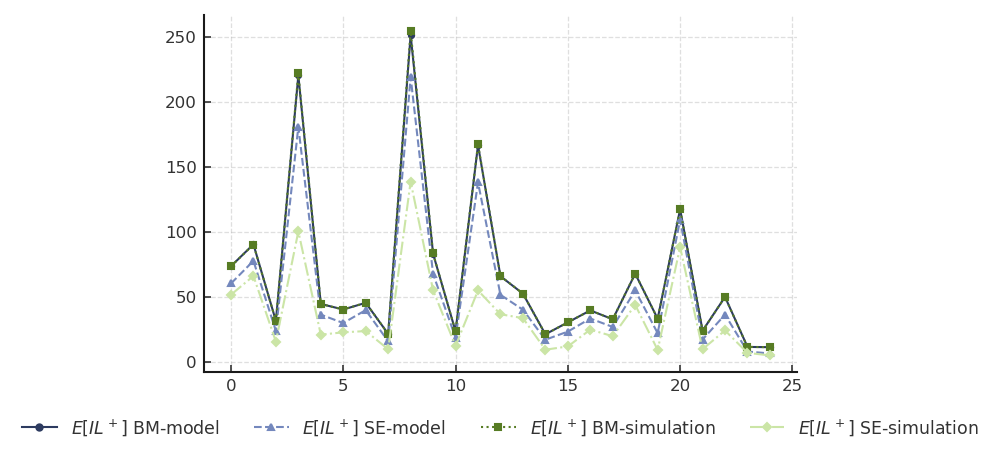

In [69]:
# Stock on hand per item combined
df = results_df.loc[ids_combined]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System stock on hand] BM model"].values
y_SE = df["E[System stock on hand] SE model"].values
y_BM_sim = df["E[System stock on hand] BM simulation"].values
y_SE_sim = df["E[System stock on hand] SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_BM, label = "$E[IL^+]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$E[IL^+]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$E[IL^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$E[IL^+]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 4)

print("Soh per item, combined policy")
plt.savefig(f"{graph_dir}/14_SoH_per_item_combined.png")
plt.show()

Soh per item, regular policy


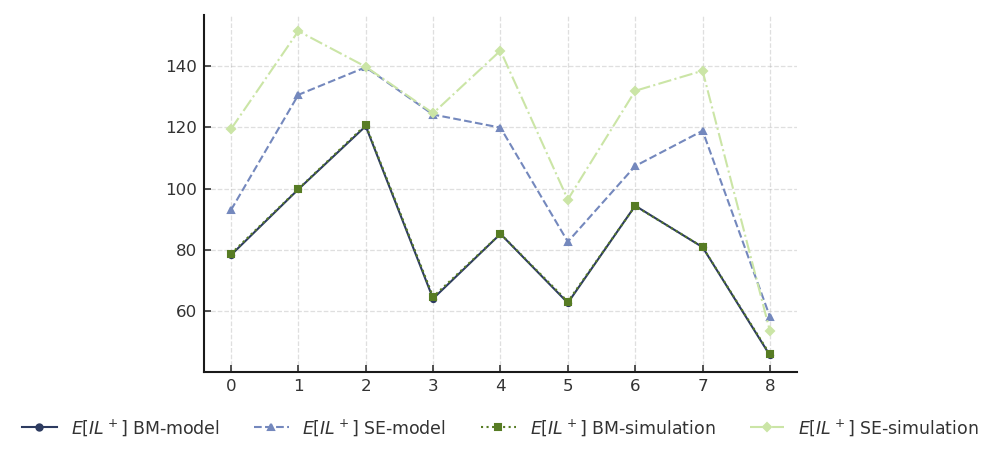

In [70]:
# Stock on hand per item regular
df = results_df.loc[ids_regular]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System stock on hand] BM model"].values
y_SE = df["E[System stock on hand] SE model"].values
y_BM_sim = df["E[System stock on hand] BM simulation"].values
y_SE_sim = df["E[System stock on hand] SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_BM, label = "$E[IL^+]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$E[IL^+]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$E[IL^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$E[IL^+]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 4)

print("Soh per item, regular policy")
plt.savefig(f"{graph_dir}/15_SoH_per_item_regular.png")
plt.show()

# Expected backorders

Backorders per item, combined policy


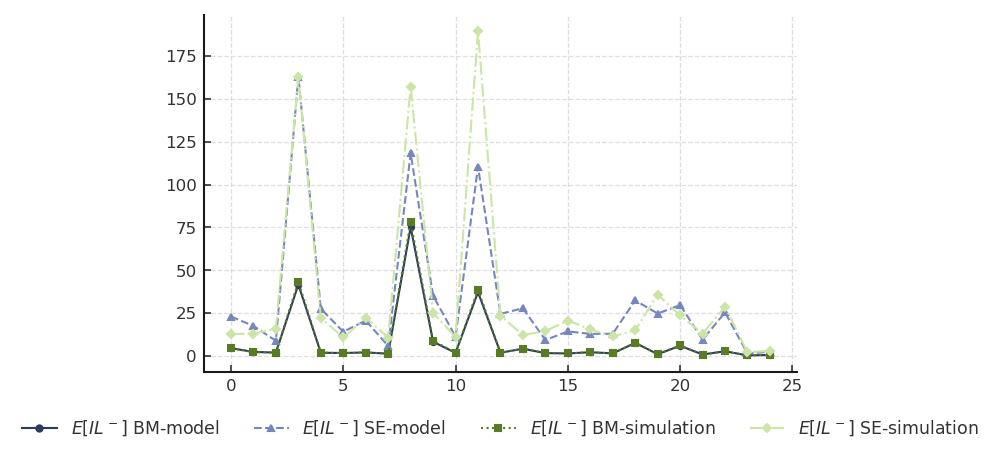

In [71]:
# backorders per item combined
df = results_df.loc[ids_combined]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System backorders] BM model"].values
y_SE = df["E[System backorders] SE model"].values
y_BM_sim = df["E[System backorders] BM simulation"].values
y_SE_sim = df["E[System backorders] SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_BM, label = "$E[IL^-]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$E[IL^-]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$E[IL^-]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$E[IL^-]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 4)

print("Backorders per item, combined policy")
plt.savefig(f"{graph_dir}/16_backorders_per_item_combined.png")
plt.show()

Backorders per item, regular policy


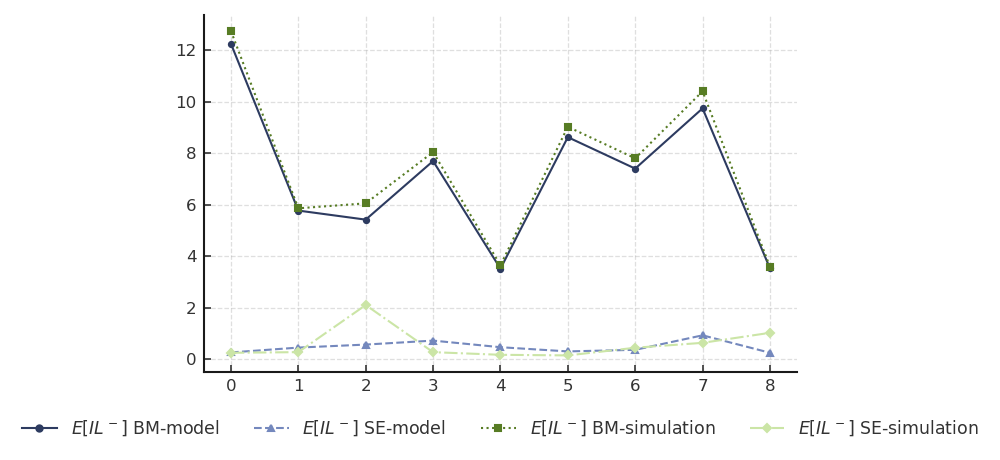

In [73]:
# backorders per item regular
df = results_df.loc[ids_regular]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System backorders] BM model"].values
y_SE = df["E[System backorders] SE model"].values
y_BM_sim = df["E[System backorders] BM simulation"].values
y_SE_sim = df["E[System backorders] SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_BM, label = "$E[IL^-]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$E[IL^-]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$E[IL^-]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$E[IL^-]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 4)

print("Backorders per item, regular policy")
plt.savefig(f"{graph_dir}/17_backorders_per_item_regular.png")
plt.show()